In [12]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import collections

In [2]:
df = pd.read_csv("correlations.dat", sep='\t', header=None)
df.head()

,0,1,2
0,0,1,1.067260e-03
1,0,2,9.501410e-03
2,0,3,3.622410e-04
3,0,4,4.813000e-05
4,0,5,1.110220e-16


In [83]:
G=nx.Graph()

In [84]:
#G.add_nodes_from(np.arange(np.max(df.loc[:,1])))

In [85]:
for edge in df.loc[:,:].values:
    #G.add_weighted_edges_from([(edge[0],edge[1],edge[2])])
    if edge[2] > 0.05:
        G.add_node(edge[0])
        G.add_node(edge[1])
        G.add_edge(edge[0],edge[1])

In [86]:
G.number_of_nodes()

879

In [87]:
G.number_of_edges()

70803

In [88]:
options = {'node_color': 'orange', "edge_color":'gray', "font_color": 'white', "font-family":"Helvetica", "font_size":'20', "font_style":"bold", 'node_size': 50, 'width': 1, 'with_labels': False}

In [56]:
lay = nx.layout.spring_layout(G, k=0.7)

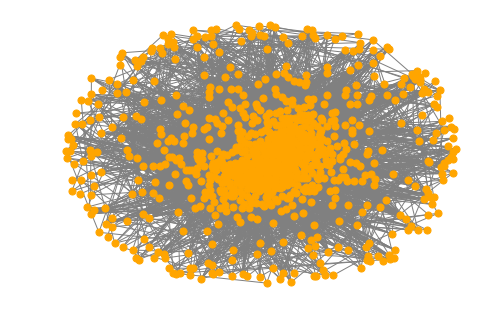

In [89]:
fig = plt.figure()
nx.draw(G, pos=lay, **options)
plt.show()

In [90]:
plt.savefig("graph.png")

<Figure size 432x288 with 0 Axes>

In [100]:
degree_sequence = [d for n, d in G.degree()]  # degree sequence

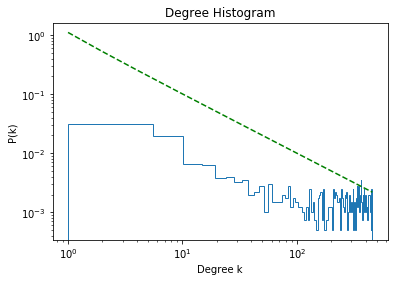

In [104]:
fig = plt.figure()
plt.hist(degree_sequence, density=True, histtype='step', bins=100)
x=np.arange(1, np.max(degree_sequence))
plt.plot(x, 1./(x-0.1), 'g--')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram")
plt.ylabel("P(k)")
plt.xlabel("Degree k")
plt.show()

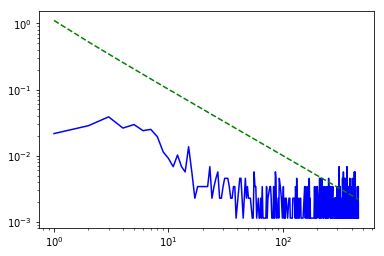

In [113]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.xscale('log')
plt.yscale('log')
norm = np.sum(cnt)
plt.plot(deg, np.array(cnt,dtype=float)/norm, color='b')
x=np.arange(1, np.max(degree_sequence))
plt.plot(x, 1./(x-0.1), 'g--')
plt.show()